In [75]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from computerrefractored import Computer
import utils
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
noun, verb = 0,0
f=open('input.txt').read()
memory = tuple(int(i) for i in f.split(',')) # let's make it immutable as a tuple
memsize = 100000
memory = tuple(list(memory)+[0]*memsize)
c = Computer(list(memory),noun,verb,[1])

# # north (1), south (2), west (3), and east (4)
# 0: The repair droid hit a wall. Its position has not changed.
# 1: The repair droid has moved one step in the requested direction.
# 2: The repair droid has moved one step in the requested direction; its new position is the location of the oxygen system.

def newlocation(loc, chosen):
    if chosen ==1: return (loc[0]+1,loc[1])
    elif chosen ==2: return (loc[0]-1,loc[1])
    elif chosen==3: return (loc[0],loc[1]-1)
    elif chosen ==4: return (loc[0],loc[1]+1)

empty = set()
wall = set()

loc = (0,0)
direction = [1,2,3,4]

while True:
    if i % 10000 == 0: print(i)
    chosen = np.random.choice(direction)
    c.receiveinput(chosen)
    answer = c.run()
    newloc = newlocation(loc,chosen)

    if answer == 0: 
        wall.add(newloc) 
    if answer == 1: 
        empty.add(newloc)
        loc = newloc
    if answer == 2: 
        empty.add(newloc)
        loc = newloc
        print('location found',newloc)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000


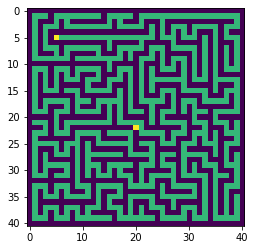

In [251]:
dim = utils.dimensions(list(wall|empty))
walls,emptys = utils.normalize(list(wall),list(empty))

pic = np.zeros(np.product(dim.range)).reshape(dim.range)
# no need to draw the walls, consider them 0
pic[tuple(zip(*emptys))]=2 # list needs to be converted by index in multidemensional indexing
pic[(-14-dim.min[0],-16-dim.min[1])]=3
pic[(dim.min[0],dim.min[1])]=3
plt.imshow(pic)

In [35]:
part 1
import networkx as nx
G=nx.Graph()
for e in empty:
    if newlocation(e,1) in empty: G.add_edge(e,newlocation(e,1))
    if newlocation(e,2) in empty: G.add_edge(e,newlocation(e,2))
    if newlocation(e,3) in empty: G.add_edge(e,newlocation(e,3))
    if newlocation(e,4) in empty: G.add_edge(e,newlocation(e,4))
G.add_nodes_from(empty)
len(nx.shortest_path(G, source=(0,0), target=(-14,-16)))-1

298

In [39]:
# part 2
dis = []
for e in empty:
    dis.append(len(nx.shortest_path(G, source=(-14,-16), target=e))-1)
max(dis)

346

In [1]:
# didnt need this for the brute force approach
def navigate(loc,dest):
    return nx.shortest_path(G, source=(-14,-16), target=e)[:0]

def getnext(loc,dest):
    if loc[0]+1 == dest[0] return 1
    if (loc[0]-1,loc[1]): return 2
    if (loc[0],loc[1]-1): return 3
    if (loc[0],loc[1]+1): return 4
    else: print('error')

target = (0,0)
navigation = navigate(loc,target)
while navigation:
    chosen = getnext(navigation[0])
    del navigation[0]
    c.receiveinput(chosen)
    answer = c.run()
    newloc = newlocation(loc,chosen)

    if answer == 0: 
        wall.add(newloc) 
    if answer == 1: 
        empty.add(newloc)
        loc = newloc
    if answer == 2: 
        empty.add(newloc)
        print('location found',newloc)
print('arrived')


SyntaxError: invalid syntax (<ipython-input-1-d7b9741023be>, line 6)